# Why Logistic Regression in Classification ?

Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. 

Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1.

Example problem with explanation is given [here](https://www.geeksforgeeks.org/ml-why-logistic-regression-in-classification/)

Using Linear Regression, all predictions >= 0.5 can be considered as 1 and rest all < 0.5 can be considered as 0. 

1) In logistic regression we have a hypothesis y = mx+c

2) And to use it for the classification task, we use the sigmoid funciton

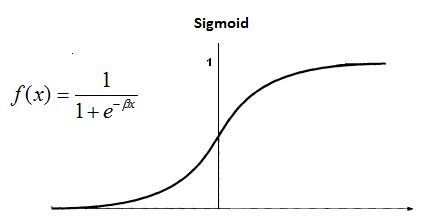

3) This is our hypothesis. y = mx+c = 1/ 1+ e-(mx+c) Depending on the input, we find out a value. 

4) And if if it is > 0.5 then the predicted outcome/value would be 1 

5) If it is < 0.5 then the predicted outcome/value would be 0 

## Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## About Data

This data comprised of kernels belonging to two different varieties of wheat: Kama and Canadian.

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4.pi.A / P^2, Here, A is area
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.     

## Loading Data

In [3]:
data = pd.read_csv(r"Logistic Regression\seed_data.csv")

In [4]:
data = data[:1000]

**A little bit of data exploration**

In [5]:
data.head(10)

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove,kernel
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   length                210 non-null    float64
 4   width                 210 non-null    float64
 5   asymmetry             210 non-null    float64
 6   length_kernel_groove  210 non-null    float64
 7   kernel                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


## Based on the above parameters, we have to classify that to which class the particular kernel belongs or this particular seed belongs to??

#### Counting unique values

In [7]:
data['kernel'].unique()#we have 3 unique categories 0, 1 and 2

array([0, 1, 2], dtype=int64)

In [8]:
data['kernel'].value_counts()

2    70
1    70
0    70
Name: kernel, dtype: int64

#### Splitting data

In [9]:
# training dataset and labels
x = data.drop(data.columns[[7]], axis = 1) #retreiving all the the columns except last column
y = data['kernel']# retreiving only kernal column

In [10]:
x.head()

,area,perimeter,compactness,length,width,asymmetry,length_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: kernel, dtype: int64

In [12]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)

###  Why we need to scale our data?
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. ... If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

1) We can see that each parameter (area,perimeter,compactness,length,width, asymmetry, length_kernel_groove) has different distribution.

2) So, to have a similar distribution and to train our model with an unbiased values, we need to scale our data.

3) Thus, standard scalar is use.

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [20]:
xtrain 
# the values are between -1 to +1,
# It is a very effective technique which re-scales a feature value
# so that it has distribution with 0 mean value and variance equals to 1.

array([[-0.74611567, -0.65972366, -1.02218665, ..., -0.90632233,
        -0.25413579, -0.34853337],
       [ 0.6223282 ,  0.69525799,  0.18452295, ...,  0.57172364,
        -1.09659973,  0.96335943],
       [-0.43215847, -0.52346852,  0.74704923, ..., -0.25267384,
        -0.73259674, -0.45616544],
       ...,
       [ 1.48229791,  1.44466125,  0.83324277, ...,  1.50550719,
        -0.40186643,  1.58884393],
       [ 0.06266537,  0.0139823 ,  0.80148726, ...,  0.33694377,
        -0.48571355, -0.46225783],
       [-1.20681373, -1.18960475, -1.30344978, ..., -1.30117937,
         0.41331392, -0.81764674]])

# <font color = "green">Logistic Regression</font>

### Training model

In [21]:
# using sklearn library
# fitting logistic regression model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression()

### Predicting Test_input

In [16]:
y_pred = classifier.predict(xtest)

### Results

In [17]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [22]:
cm

array([[16,  0,  1],
       [ 3, 18,  0],
       [ 0,  0, 15]], dtype=int64)

What is [confusion matric](https://www.guru99.com/confusion-matrix-machine-learning-example.html) 

Computation: cm is the confusion matrix

1) The diagonal value are the True Positive values.

2) The accuracy will be the sum of all the diagonal values in a matrix(TP values), i.e. 16+18+15 / total sum of the matrix

3) Rest of the values are False Negative and False Positive values

4) Our target is to find out the correct predictions.

5) The correct predictions are the diagonal vlaues 

6) It means that 16: this was the zero class and we have predicted zero class.
same goes with 18, we predicted first class and first row
same goes with 15

7) number 3 in a matrix: means it was first(or 1), but we have predicted as zero. There are actually 3 data entries, which actually belong to class one, but we have predicted to be class zero.

8) same goes with number 1, actual class was zero but predicted to be two class. So, these are errors. 

9) To find the accuracy score, we need to use accuracy_score

10) y test and y predict is to be compared, and the accuracy score has come 0.9245283018867925 i.e. 92.45%

11) So, we are classifying the data and based on every parameters whether seed belongs to the particular class A, B or C with an accuracy level of 92.45%

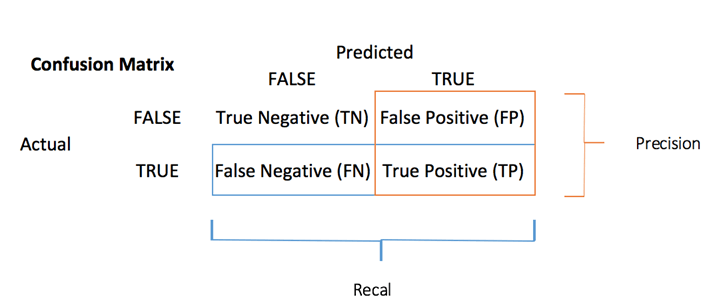

Confusion matrix

How to Calculate a Confusion Matrix

The confusion matrix visualizes the accuracy of a classifier by comparing the actual and predicted classes. The binary confusion matrix is composed of squares:

Here, is step by step process for calculating a confusion Matrix in data mining

Step 1) First, you need to test dataset with its expected outcome values.
Step 2) Predict all the rows in the test dataset.
Step 3) Calculate the expected predictions and outcomes:

The total of correct predictions of each class.
The total of incorrect predictions of each class.

After that, these numbers are organized in the below-given methods:

1) Every row of the matrix links to a predicted class.
2) Every column of the matrix corresponds with an actual class.
3) The total counts of correct and incorrect classification are entered into the table.
4) The sum of correct predictions for a class go into the predicted column and expected row for that class value.
5) The sum of incorrect predictions for a class goes into the expected row for that class value and the predicted column for that specific class value.

In [18]:
cm

array([[16,  0,  1],
       [ 3, 18,  0],
       [ 0,  0, 15]], dtype=int64)

In [19]:
# finding accuracy

from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_pred)

0.9245283018867925

we can say that there is 92.45% chance that the particular seed belongs to class A, or class B